In [4]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from PIL import Image
from io import BytesIO

%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

In [11]:
os.listdir('C:/Users/Daniel/data/world-of-warcraft-items-dataset')
['neck.csv',
 'head.csv',
 'Off Hand.csv',
 'shirt.csv',
 'wrist.csv',
 'Main Hand.csv',
 'tabard.csv',
 'One-Hand.csv',
 'Held In Off-hand.csv',
 'two hand.csv',
 'ranged.csv',
 'chest.csv',
 'trinket.csv',
 'legs.csv',
 'shoulder.csv',
 'waist.csv',
 'finger.csv',
 'thrown.csv',
 'hands.csv',
 'shield.csv',
 'feet.csv',
 'back.csv']

['neck.csv',
 'head.csv',
 'Off Hand.csv',
 'shirt.csv',
 'wrist.csv',
 'Main Hand.csv',
 'tabard.csv',
 'One-Hand.csv',
 'Held In Off-hand.csv',
 'two hand.csv',
 'ranged.csv',
 'chest.csv',
 'trinket.csv',
 'legs.csv',
 'shoulder.csv',
 'waist.csv',
 'finger.csv',
 'thrown.csv',
 'hands.csv',
 'shield.csv',
 'feet.csv',
 'back.csv']

In [12]:
for file in os.listdir('C:/Users/Daniel/data/world-of-warcraft-items-dataset'):
    df = pd.read_csv(f'C:/Users/Daniel/data/world-of-warcraft-items-dataset/{file}')
    print(f'{file}: {df.shape[0]} items')

back.csv: 2975 items
chest.csv: 5665 items
feet.csv: 4850 items
finger.csv: 3355 items
hands.csv: 5763 items
head.csv: 5447 items
Held In Off-hand.csv: 702 items
legs.csv: 5507 items
Main Hand.csv: 166 items
neck.csv: 2271 items
Off Hand.csv: 62 items
One-Hand.csv: 4580 items
ranged.csv: 1736 items
shield.csv: 1073 items
shirt.csv: 4 items
shoulder.csv: 5388 items
tabard.csv: 53 items
thrown.csv: 96 items
trinket.csv: 3459 items
two hand.csv: 3238 items
waist.csv: 4692 items
wrist.csv: 4811 items


In [ ]:

urls = ['https://i.imgur.com/H4OXGV3.png', 'https://www.raiditem.com/upload/itemico/201704091108461.jpg']

fig = plt.figure(figsize = (13, 9))
for i, url in enumerate(urls):
    r = requests.get(url)
    plt.subplot(f'12{i+1}')
    plt.imshow(Image.open(BytesIO(r.content)))
    plt.axis('off')

In [16]:
DATA_DIR = r"C:\Users\Daniel\data\world-of-warcraft-items-dataset"


csv_files = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(".csv")]
print(f"Found {len(csv_files)} CSVs:", csv_files)


def read_csv_safe(path):
    for enc in ("utf-8", "utf-8-sig", "cp1252", "latin1"):
        try:
            return pd.read_csv(path, encoding=enc)
        except UnicodeDecodeError:
            continue
    # Last resort
    return pd.read_csv(path, encoding_errors="ignore")


dfs = {}
for name in csv_files:
    full_path = os.path.join(DATA_DIR, name)
    df = read_csv_safe(full_path)
    
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    dfs[os.path.splitext(name)[0]] = df


key = next(iter(dfs))
print(f"\nPreview: {key}.csv")
display(dfs[key].head())


counts = pd.Series({k: len(v) for k, v in dfs.items()}).sort_values(ascending=False)
counts


Found 22 CSVs: ['back.csv', 'chest.csv', 'feet.csv', 'finger.csv', 'hands.csv', 'head.csv', 'Held In Off-hand.csv', 'legs.csv', 'Main Hand.csv', 'neck.csv', 'Off Hand.csv', 'One-Hand.csv', 'ranged.csv', 'shield.csv', 'shirt.csv', 'shoulder.csv', 'tabard.csv', 'thrown.csv', 'trinket.csv', 'two hand.csv', 'waist.csv', 'wrist.csv']

Preview: back.csv


,agi,agiint,agistr,agistrint,arcres,armor,atkpwr,classes,cooldown,critstrkrtng,dodgertng,firres,frores,hastertng,int,itemset,mastrtng,name_enus,natres,nsockets,parryrtng,quality,reqlevel,rgdhastepct,slotbak,socket1,socket2,speed,splhastepct,sta,str,strint,versatility
0,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,134.0,NaN,NaN,Stormpike Soldier's Cloak,NaN,NaN,NaN,Epic,10.0,NaN,16.0,NaN,NaN,NaN,NaN,200.0,134.0,NaN,54.0
1,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,69.0,NaN,NaN,NaN,49.0,134.0,NaN,NaN,Stormpike Sage's Cloak,NaN,NaN,NaN,Epic,10.0,NaN,16.0,NaN,NaN,NaN,NaN,200.0,134.0,NaN,NaN
2,134.0,NaN,NaN,134.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,134.0,NaN,NaN,Frostwolf Legionnaire's Cloak,NaN,NaN,NaN,Epic,10.0,NaN,16.0,NaN,NaN,NaN,NaN,200.0,134.0,NaN,54.0
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banner Cloak,NaN,NaN,NaN,Uncommon,NaN,NaN,16.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demon Scarred Cloak,NaN,NaN,NaN,Common,5.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


hands               5763
chest               5665
legs                5507
head                5447
shoulder            5388
feet                4850
wrist               4811
waist               4692
One-Hand            4580
trinket             3459
finger              3355
two hand            3238
back                2975
neck                2271
ranged              1736
shield              1073
Held In Off-hand     702
Main Hand            166
thrown                96
Off Hand              62
tabard                53
shirt                  4
dtype: int64

Text(0.5, 1.0, 'Number of 2handed weapons by level')

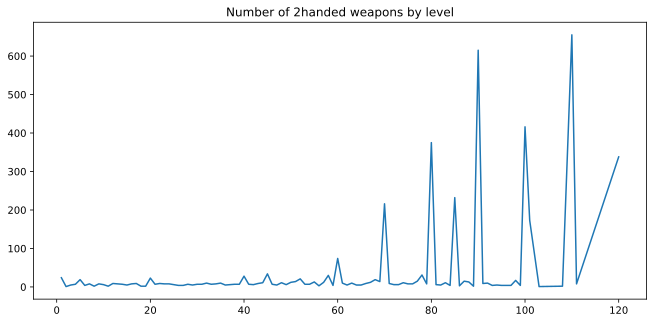

In [18]:
# Number of 2handed weapons by level
# We can see peaks on last levels for each expansion pack - 60, 70, 80, 85 and so on
counts = df['reqlevel'].value_counts()
fig = plt.figure(figsize = (11, 5))
sns.lineplot(x = counts.index.values, y = counts.values).set_title('Number of 2handed weapons by level')


Columns: ['agi', 'agiint', 'agistr', 'agistrint', 'arcres', 'armor', 'classes', 'cooldown', 'critstrkrtng', 'dmg', 'dmgmax1', 'dmgmin1', 'dodgertng', 'dps', 'dura', 'firres', 'frores', 'hastertng', 'int', 'lifesteal', 'mastrtng', 'mledmgmax', 'mledmgmin', 'mledps', 'mlespeed', 'name_enus', 'natres', 'nsockets', 'parryrtng', 'pvppower', 'quality', 'reqlevel', 'slotbak', 'socket1', 'socket2', 'socket3', 'speed', 'splcritstrkrtng', 'splpwr', 'sta', 'str', 'versatility']
Using columns -> min: dmgmin1, max: dmgmax1, level: reqlevel


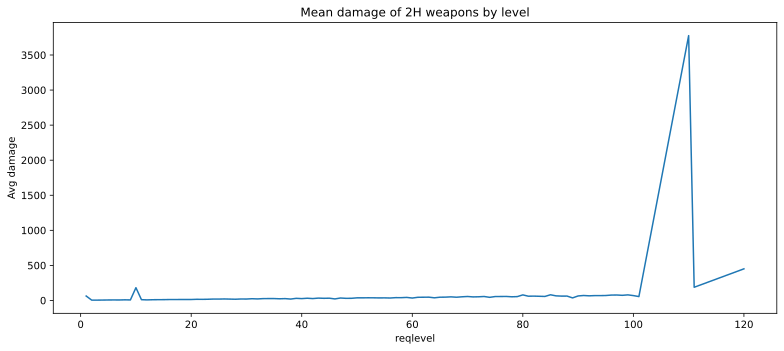

In [37]:
import re
from difflib import get_close_matches

# --- Pick the right DataFrame (2H weapons) ---
# Try a few likely keys; adjust if your key differs
twoh_keys_guess = ["two hand", "two_hand", "two-hand", "twohand", "2hand", "two hand.csv"]
df_2h = None
for k in twoh_keys_guess:
    if k in dfs:
        df_2h = dfs[k]
        break

# If not found, just pick one to demo (you can set df_2h = dfs['<your key>'])
if df_2h is None:
    print("Couldn't auto-detect the 2H dataframe. Available keys:", list(dfs.keys()))
    df_2h = next(iter(dfs.values()))  # fallback so code runs

cols = list(df_2h.columns)
print("Columns:", cols)

# --- Helper to find best matching column by patterns and fallbacks ---
def find_col(candidates, columns):
    # exact
    for c in candidates:
        if c in columns:
            return c
    # regex
    for pat in candidates:
        try:
            r = re.compile(pat)
            for c in columns:
                if r.fullmatch(c) or r.search(c):
                    return c
        except re.error:
            pass
    # fuzzy
    for c in candidates:
        m = get_close_matches(c, columns, n=1, cutoff=0.6)
        if m:
            return m[0]
    return None

# Likely names for damage and level
min_candidates = [
    "dmgmin1", "dmg_min_1", "min_dmg", "mindamage", r"dmg.*min.*1", r"min.*dmg"
]
max_candidates = [
    "dmgmax1", "dmg_max_1", "max_dmg", "maxdamage", r"dmg.*max.*1", r"max.*dmg"
]
lvl_candidates = [
    "reqlevel", "req_level", "required_level", "required_lvl",
    "item_level", "ilevel", "ilvl", "level"
]

min_col = find_col(min_candidates, cols)
max_col = find_col(max_candidates, cols)
lvl_col = find_col(lvl_candidates, cols)

if not (min_col and max_col):
    raise KeyError(f"Couldn't find min/max damage columns. Closest guesses: "
                   f"min -> {get_close_matches('dmgmin1', cols, n=3)}, "
                   f"max -> {get_close_matches('dmgmax1', cols, n=3)}")

if not lvl_col:
    raise KeyError(f"Couldn't find a level column. Closest guesses: "
                   f"{get_close_matches('reqlevel', cols, n=5)}")

print(f"Using columns -> min: {min_col}, max: {max_col}, level: {lvl_col}")

# --- Compute average damage and plot by level ---
df_plot = df_2h[[min_col, max_col, lvl_col]].copy()

# force numeric
for c in [min_col, max_col, lvl_col]:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

df_plot["avg_dmg"] = (df_plot[min_col] + df_plot[max_col]) / 2
mean_dmg_per_level = (
    df_plot[[ "avg_dmg", lvl_col ]]
    .dropna()
    .groupby(lvl_col, as_index=False)
    .mean()
    .sort_values(lvl_col)
)

plt.figure(figsize=(11, 5))
sns.lineplot(data=mean_dmg_per_level, x=lvl_col, y="avg_dmg")
plt.title("Mean damage of 2H weapons by level")
plt.xlabel(lvl_col)
plt.ylabel("Avg damage")
plt.tight_layout()
plt.show() #huge peak at level 110 an drop on 110-120 level because of new damage system in BfA expansion

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Daniel/data/world-of-warcraft-items-dataset/head.csv")
df.head()
df.columns

Index(['agi', 'agiint', 'arcres', 'armor', 'armorbonus', 'classes', 'cooldown',
       'critstrkrtng', 'dodgertng', 'dura', 'firres', 'frores', 'hastertng',
       'healthrgn', 'int', 'itemset', 'manargn', 'mastrtng', 'name_enus',
       'natres', 'nsockets', 'parryrtng', 'quality', 'reqarenartng',
       'reqlevel', 'reqspell', 'slotbak', 'socket1', 'socket2', 'socket3',
       'speed', 'splpwr', 'sta', 'str', 'strint', 'versatility'],
      dtype='object')

,slot,primary_pct,secondary_pct
3,finger,0.546650,0.453350
9,neck,0.802423,0.197577
12,ranged,0.865921,0.134079
10,off hand,0.868467,0.131533
2,feet,0.876866,0.123134
20,waist,0.880784,0.119216
6,held in off-hand,0.885685,0.114315
7,legs,0.886930,0.113070
13,shield,0.892370,0.107630
21,wrist,0.896665,0.103335


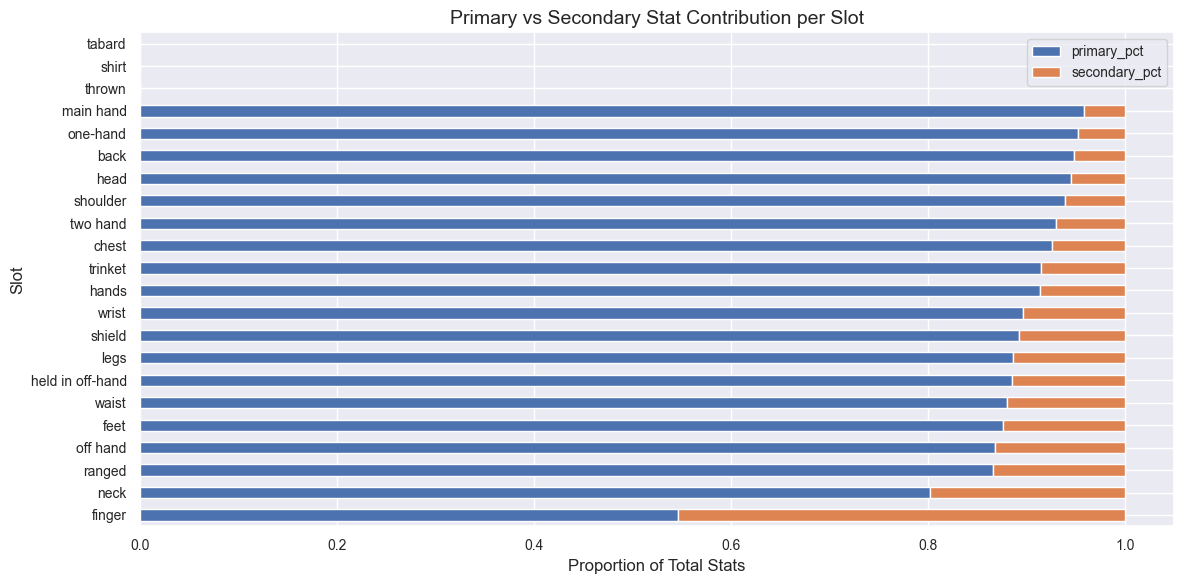

In [21]:
cols_primary   = [c for c in PRIMARY_STATS   if c in items.columns]
cols_secondary = [c for c in SECONDARY_STATS if c in items.columns]

if not cols_primary and not cols_secondary:
    print("No recognizable primary/secondary stat columns found.")
else:
    # Sum total primary + secondary stats per slot
    agg = items.groupby("slot")[cols_primary + cols_secondary].sum(numeric_only=True)
    agg["primary_sum"]   = agg[cols_primary].sum(axis=1)   if cols_primary else 0
    agg["secondary_sum"] = agg[cols_secondary].sum(axis=1) if cols_secondary else 0
    total = agg["primary_sum"] + agg["secondary_sum"]

    # Percent breakdown
    out = pd.DataFrame({
        "slot": agg.index,
        "primary_pct": np.where(total>0, agg["primary_sum"]/total, 0),
        "secondary_pct": np.where(total>0, agg["secondary_sum"]/total, 0),
    }).sort_values("secondary_pct", ascending=False)

    display(out.head(10))

    # Horizontal stacked bar chart
    out_plot = out.set_index("slot")[["primary_pct","secondary_pct"]]
    out_plot.plot(kind="barh", stacked=True)
    plt.title("Primary vs Secondary Stat Contribution per Slot")
    plt.ylabel("Slot")
    plt.xlabel("Proportion of Total Stats")
    plt.tight_layout()
    plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9312\2186635103.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["slot","_quality"]).size()


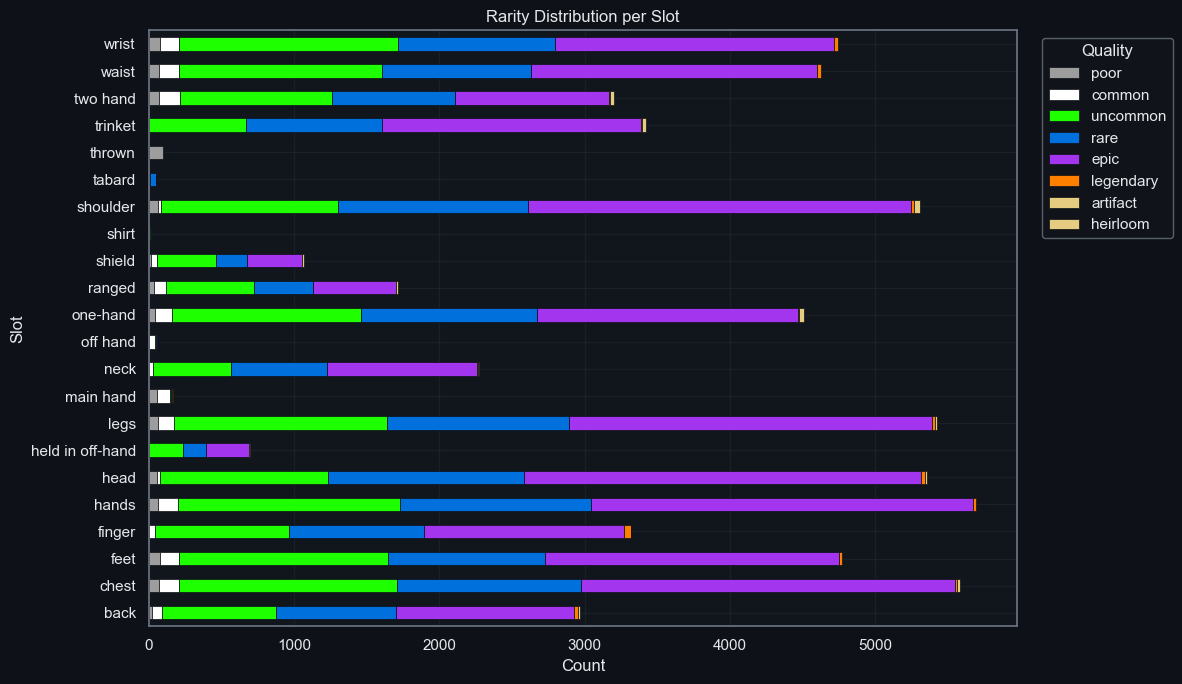

In [30]:
# --- FORCE DARK THEME (robust) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

FIG_BG   = "#0e1117"   # page
AX_BG    = "#11161c"   # plot area
GRID_C   = "#2a3441"
SPINE_C  = "#6b7280"
TEXT_C   = "#e5e7eb"

plt.rcParams.update({
    "figure.facecolor": FIG_BG,
    "axes.facecolor": AX_BG,
    "savefig.facecolor": FIG_BG,
    "axes.edgecolor": SPINE_C,
    "axes.labelcolor": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C,
    "text.color": TEXT_C,
    "grid.color": GRID_C,
    "grid.alpha": 0.35,
})

# --- WoW quality colors + normalization ---
QUALITY_ORDER = ["poor","common","uncommon","rare","epic","legendary","artifact","heirloom"]
NUM_TO_NAME = {0:"poor",1:"common",2:"uncommon",3:"rare",4:"epic",5:"legendary",6:"artifact",7:"heirloom"}
QUALITY_COLORS = {
    "poor":"#9D9D9D","common":"#FFFFFF","uncommon":"#1EFF00","rare":"#0070DD",
    "epic":"#A335EE","legendary":"#FF8000","artifact":"#E6CC80","heirloom":"#E6CC80",
}

def normalize_quality_series(s: pd.Series) -> pd.Categorical:
    s_num = pd.to_numeric(s, errors="coerce")
    if s_num.notna().any() and s_num.dropna().isin(NUM_TO_NAME.keys()).mean() > 0.5:
        mapped = s_num.map(NUM_TO_NAME)
    else:
        mapped = (s.astype(str).str.strip().str.lower()
                    .str.replace(r"\s+", " ", regex=True)
                    .str.replace("artefact", "artifact"))
    return pd.Categorical(mapped, categories=QUALITY_ORDER, ordered=True)

# --- build rarity table ---
if quality_col:
    qnorm = normalize_quality_series(items[quality_col])
    rarity = (
        items.assign(_quality=qnorm)
             .groupby(["slot","_quality"]).size()
             .unstack(fill_value=0)
             .sort_index()
    )
    present = [q for q in QUALITY_ORDER if q in rarity.columns]
    rarity  = rarity[present]
    colors  = [QUALITY_COLORS[q] for q in present]

    # --- plot: horizontal + real dark background ---
    fig, ax = plt.subplots(figsize=(12, 7))
    rarity.plot(kind="barh", stacked=True, color=colors, edgecolor="#0b0f14", linewidth=0.5, ax=ax)

    ax.set_title("Rarity Distribution per Slot", color=TEXT_C)
    ax.set_xlabel("Count", color=TEXT_C)
    ax.set_ylabel("Slot", color=TEXT_C)
    ax.set_facecolor(AX_BG)
    ax.grid(True, axis="both")

    # legend styling on dark
    leg = ax.legend(title="Quality", bbox_to_anchor=(1.02, 1), loc="upper left")
    if leg and leg.get_frame():
        leg.get_frame().set_facecolor(AX_BG)
        leg.get_frame().set_edgecolor(SPINE_C)

    # darker spines
    for spine in ax.spines.values():
        spine.set_color(SPINE_C)

    plt.tight_layout()
    plt.show()
else:
    print("No 'quality' column found; skipping rarity chart.")


C:\Users\Daniel\AppData\Local\Temp\ipykernel_9312\2587811546.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["slot","_quality"]).size()


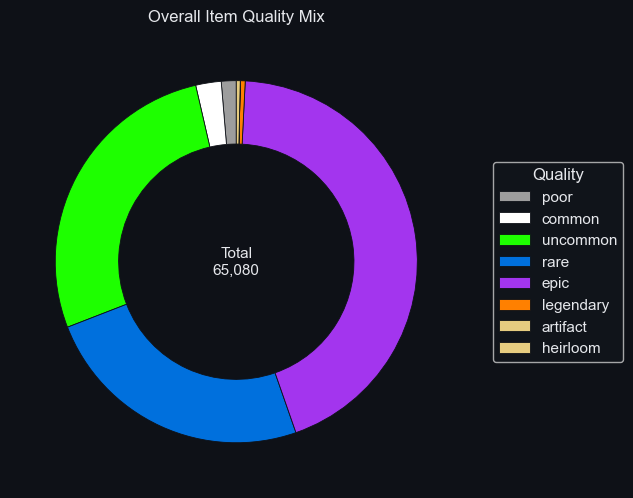

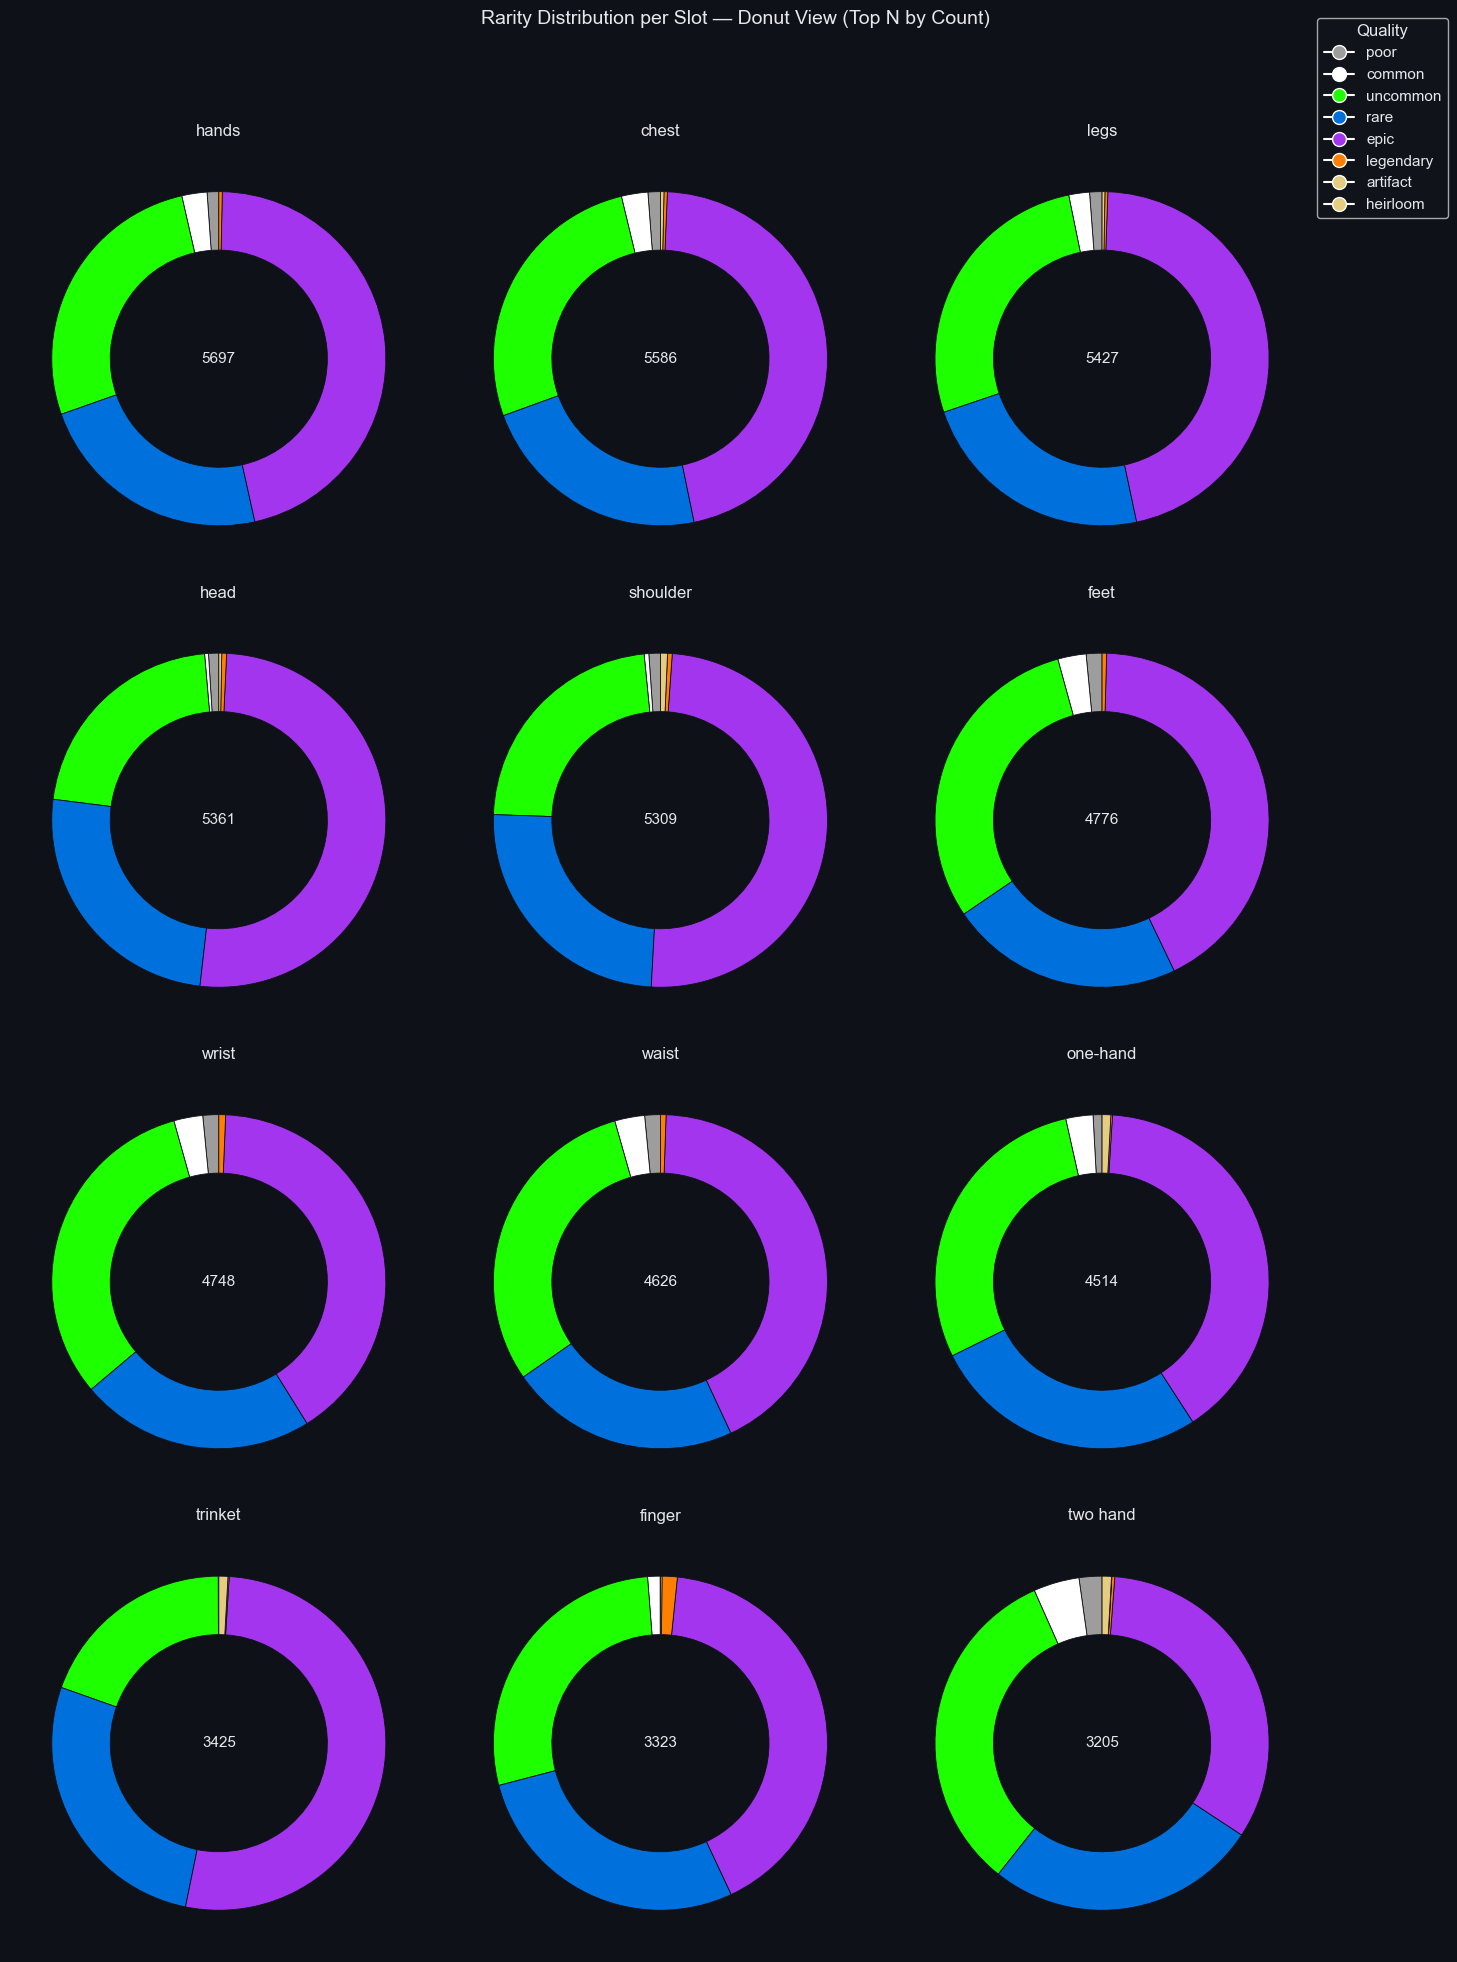

In [32]:
# === Donut ("wheel pie") rarity charts with official WoW colors + dark theme ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Dark theme (explicit) ----
FIG_BG   = "#0e1117"
AX_BG    = "#11161c"
TEXT_C   = "#e5e7eb"

plt.rcParams.update({
    "figure.facecolor": FIG_BG,
    "axes.facecolor": AX_BG,
    "savefig.facecolor": FIG_BG,
    "axes.labelcolor": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C,
    "text.color": TEXT_C,
})

# ---- WoW quality color map ----
QUALITY_ORDER = ["poor","common","uncommon","rare","epic","legendary","artifact","heirloom"]
NUM_TO_NAME = {0:"poor",1:"common",2:"uncommon",3:"rare",4:"epic",5:"legendary",6:"artifact",7:"heirloom"}
QUALITY_COLORS = {
    "poor":"#9D9D9D",
    "common":"#FFFFFF",
    "uncommon":"#1EFF00",
    "rare":"#0070DD",
    "epic":"#A335EE",
    "legendary":"#FF8000",
    "artifact":"#E6CC80",
    "heirloom":"#E6CC80",
}

def normalize_quality_series(s: pd.Series) -> pd.Categorical:
    s_num = pd.to_numeric(s, errors="coerce")
    if s_num.notna().any() and s_num.dropna().isin(NUM_TO_NAME.keys()).mean() > 0.5:
        mapped = s_num.map(NUM_TO_NAME)
    else:
        mapped = (s.astype(str).str.strip().str.lower()
                  .str.replace(r"\s+", " ", regex=True)
                  .str.replace("artefact", "artifact"))
    return pd.Categorical(mapped, categories=QUALITY_ORDER, ordered=True)

def make_donut(ax, values, labels, colors, title, center_text=None):
    # filter zeroes so tiny slices don’t clutter
    mask = np.array(values) > 0
    values = np.array(values)[mask]
    labels = np.array(labels)[mask]
    colors = np.array(colors)[mask]

    # donut
    wedges, _ = ax.pie(
        values,
        labels=None,                # legend will show labels
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.35, edgecolor=FIG_BG, linewidth=0.6),
    )
    # Center hole text
    if center_text:
        ax.text(0, 0, center_text, ha="center", va="center", fontsize=11, color=TEXT_C)
    ax.set_title(title, color=TEXT_C, pad=10)
    ax.set_aspect("equal")
    ax.set_facecolor(AX_BG)

if not quality_col:
    print("No 'quality' column found; cannot build wheel pies.")
else:
    # Build rarity table (slot x quality)
    qnorm = normalize_quality_series(items[quality_col])
    rarity = (items.assign(_quality=qnorm)
                    .groupby(["slot","_quality"]).size()
                    .unstack(fill_value=0))
    # keep only qualities present, in canonical order
    present = [q for q in QUALITY_ORDER if q in rarity.columns]
    rarity = rarity[present]

    # ----- Overall donut -----
    overall = rarity.sum(axis=0)
    overall_colors = [QUALITY_COLORS[q] for q in present]

    fig, ax = plt.subplots(figsize=(6.5, 6.5))
    make_donut(
        ax,
        overall.values, present, overall_colors,
        title="Overall Item Quality Mix",
        center_text=f"Total\n{overall.sum():,}"
    )
    # Legend outside
    leg = ax.legend(present, title="Quality", loc="center left", bbox_to_anchor=(1.05, 0.5))
    leg.get_frame().set_facecolor(AX_BG)
    plt.tight_layout()
    plt.show()

    # ----- Per-slot donuts (top N slots by total items) -----
    TOP_N = 12
    totals = rarity.sum(axis=1).sort_values(ascending=False)
    top_slots = totals.index[:TOP_N]

    n = len(top_slots)
    cols = 3
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
    axes = np.atleast_1d(axes).flatten()

    for i, slot in enumerate(top_slots):
        ax = axes[i]
        vals = rarity.loc[slot, present].values
        cols_list = [QUALITY_COLORS[q] for q in present]
        make_donut(
            ax,
            vals, present, cols_list,
            title=slot,
            center_text=str(int(vals.sum()))
        )
    # Hide any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    # Single shared legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          label=lab, markerfacecolor=QUALITY_COLORS[lab], markersize=10)
               for lab in present]
    fig.legend(handles=handles, labels=present, title="Quality",
               loc="upper right", bbox_to_anchor=(0.98, 0.98), frameon=True)
    fig.patch.set_facecolor(FIG_BG)
    plt.suptitle("Rarity Distribution per Slot — Donut View (Top N by Count)", color=TEXT_C, y=0.98, fontsize=14)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()


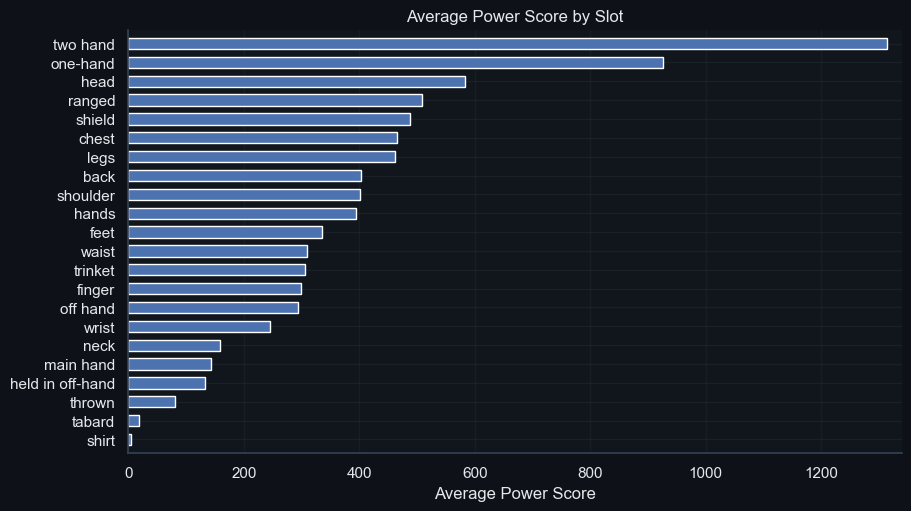

In [36]:
# Compact WoW Items power-score chart (minimal whitespace)

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"C:\Users\Daniel\data\world-of-warcraft-items-dataset")

# Load and combine
frames = []
for p in sorted(DATA_DIR.glob("*.csv")):
    try:
        df = pd.read_csv(p)
        df["slot"] = p.stem.lower().strip()
        frames.append(df)
    except Exception:
        pass

items = pd.concat(frames, ignore_index=True)
items.columns = [c.strip().lower().replace(" ", "_") for c in items.columns]

# Choose numeric stat columns (exclude ids/levels/etc.)
exclude_exact = {"slot","name","itemset","id","itemid","classes","quality"}
exclude_contains = ("level","ilevel","reqlevel","required_level","ilvl")
stat_cols = [
    c for c in items.columns
    if c not in exclude_exact
    and not any(sub in c for sub in exclude_contains)
    and pd.api.types.is_numeric_dtype(items[c])
]
if not stat_cols:
    # Fallback: any numeric except ilevel if present
    stat_cols = [c for c in items.select_dtypes(include="number").columns if c != "ilevel"]

# Compute and aggregate
items["power_score"] = items[stat_cols].sum(axis=1, min_count=1)
avg_power = (
    items.groupby("slot", as_index=False)["power_score"]
    .mean()
    .sort_values("power_score", ascending=True)
)

# Plot (compact, dark)
plt.rcParams.update({
    "figure.facecolor": "#0e1117",
    "axes.facecolor":   "#11161c",
    "axes.edgecolor":   "#334155",
    "axes.labelcolor":  "#e5e7eb",
    "xtick.color":      "#e5e7eb",
    "ytick.color":      "#e5e7eb",
})

fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
ax.barh(avg_power["slot"], avg_power["power_score"], height=0.6)
ax.set_title("Average Power Score by Slot", pad=6)
ax.set_xlabel("Average Power Score")
ax.set_ylabel("")

# Trim whitespace and visual clutter
ax.margins(y=0.02, x=0.02)
ax.grid(axis="x", alpha=0.25)
for spine in ("top","right"):
    ax.spines[spine].set_visible(False)

plt.show()